## First code cell (imports)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")


Load the datasets and do quick sanity checks

In [2]:
sentiment = pd.read_csv("../data/fear_greed.csv.csv")
trades = pd.read_csv("../data/historical.csv.csv")

print("Sentiment shape:", sentiment.shape)
print("Trades shape:", trades.shape)


Sentiment shape: (2644, 4)
Trades shape: (211224, 16)


column names

In [3]:
print("Sentiment columns:", sentiment.columns.tolist())
print("Trades columns:", trades.columns.tolist())


Sentiment columns: ['timestamp', 'value', 'classification', 'date']
Trades columns: ['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp']


Basic cell information 

In [4]:
print("=== SENTIMENT INFO ===")
display(sentiment.info())

print("\n=== TRADES INFO ===")
display(trades.info())


=== SENTIMENT INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


None


=== TRADES INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtyp

None

Checking Missing Values

In [5]:
display(trades.describe())


,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Order ID,Fee,Trade ID,Timestamp
count,211224.000000,2.112240e+05,2.112240e+05,2.112240e+05,211224.000000,2.112240e+05,211224.000000,2.112240e+05,2.112240e+05
mean,11414.723350,4.623365e+03,5.639451e+03,-2.994625e+04,48.749001,6.965388e+10,1.163967,5.628549e+14,1.737744e+12
std,29447.654868,1.042729e+05,3.657514e+04,6.738074e+05,919.164828,1.835753e+10,6.758854,3.257565e+14,8.689920e+09
min,0.000005,8.740000e-07,0.000000e+00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,1.680000e+12
25%,4.854700,2.940000e+00,1.937900e+02,-3.762311e+02,0.000000,5.983853e+10,0.016121,2.810000e+14,1.740000e+12
50%,18.280000,3.200000e+01,5.970450e+02,8.472793e+01,0.000000,7.442939e+10,0.089578,5.620000e+14,1.740000e+12
75%,101.580000,1.879025e+02,2.058960e+03,9.337278e+03,5.792797,8.335543e+10,0.393811,8.460000e+14,1.740000e+12
max,109004.000000,1.582244e+07,3.921431e+06,3.050948e+07,135329.090100,9.014923e+10,837.471593,1.130000e+15,1.750000e+12


Checking for duplicates

In [7]:
print("Sentiment duplicates:", sentiment.duplicated().sum())
print("Trades duplicates:", trades.duplicated().sum())


Sentiment duplicates: 0
Trades duplicates: 0


In [6]:
display(trades.describe())

,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Order ID,Fee,Trade ID,Timestamp
count,211224.000000,2.112240e+05,2.112240e+05,2.112240e+05,211224.000000,2.112240e+05,211224.000000,2.112240e+05,2.112240e+05
mean,11414.723350,4.623365e+03,5.639451e+03,-2.994625e+04,48.749001,6.965388e+10,1.163967,5.628549e+14,1.737744e+12
std,29447.654868,1.042729e+05,3.657514e+04,6.738074e+05,919.164828,1.835753e+10,6.758854,3.257565e+14,8.689920e+09
min,0.000005,8.740000e-07,0.000000e+00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,1.680000e+12
25%,4.854700,2.940000e+00,1.937900e+02,-3.762311e+02,0.000000,5.983853e+10,0.016121,2.810000e+14,1.740000e+12
50%,18.280000,3.200000e+01,5.970450e+02,8.472793e+01,0.000000,7.442939e+10,0.089578,5.620000e+14,1.740000e+12
75%,101.580000,1.879025e+02,2.058960e+03,9.337278e+03,5.792797,8.335543e+10,0.393811,8.460000e+14,1.740000e+12
max,109004.000000,1.582244e+07,3.921431e+06,3.050948e+07,135329.090100,9.014923e+10,837.471593,1.130000e+15,1.750000e+12



Convert sentiment date to datetime

In [7]:
sentiment["date"] = pd.to_datetime(sentiment["date"]).dt.date

sentiment.head() 

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


Converting trades timestamp (using Timestamp IST so that it is human-readable)

In [9]:
trades["date"] = pd.to_datetime(
    trades["Timestamp IST"],
    dayfirst=True
).dt.date

trades.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02


Quick Check

In [10]:
print("Sentiment date range:", sentiment["date"].min(), "to", sentiment["date"].max())
print("Trades date range:", trades["date"].min(), "to", trades["date"].max())


Sentiment date range: 2018-02-01 to 2025-05-02
Trades date range: 2023-05-01 to 2025-05-01


Creating win flag

In [11]:
# win flag per trade
trades["is_win"] = trades["Closed PnL"] > 0

trades[["Closed PnL", "is_win"]].head()


,Closed PnL,is_win
0,0.0,False
1,0.0,False
2,0.0,False
3,0.0,False
4,0.0,False


Creating Long/Short flags

In [12]:
trades["is_long"] = trades["Side"].str.lower().str.contains("buy")
trades["is_short"] = trades["Side"].str.lower().str.contains("sell")

trades[["Side", "is_long", "is_short"]].head()


,Side,is_long,is_short
0,BUY,True,False
1,BUY,True,False
2,BUY,True,False
3,BUY,True,False
4,BUY,True,False


DAILY aggregations

In [13]:
daily_metrics = (
    trades.groupby(["Account", "date"])
    .agg(
        daily_pnl=("Closed PnL", "sum"),
        trade_count=("Closed PnL", "count"),
        avg_trade_size=("Size USD", "mean"),
        win_rate=("is_win", "mean"),
        long_ratio=("is_long", "mean"),
        short_ratio=("is_short", "mean"),
    )
    .reset_index()
)

daily_metrics.head()


,Account,date,daily_pnl,trade_count,avg_trade_size,win_rate,long_ratio,short_ratio
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,0.0,177,5089.718249,0.000000,0.000000,1.000000
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,0.0,68,7976.664412,0.000000,0.000000,1.000000
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,0.0,40,23734.500000,0.000000,0.000000,1.000000
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,-21227.0,12,28186.666667,0.000000,1.000000,0.000000
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,1603.1,27,17248.148148,0.444444,0.444444,0.555556


Quick sanity check

In [14]:
print("Daily metrics shape:", daily_metrics.shape)
display(daily_metrics.describe())


Daily metrics shape: (2341, 8)


,daily_pnl,trade_count,avg_trade_size,win_rate,long_ratio,short_ratio
count,2341.000000,2341.000000,2341.000000,2341.000000,2341.000000,2341.000000
mean,4398.530091,90.228108,6989.515321,0.359926,0.489142,0.510858
std,28415.938999,214.611751,21538.691665,0.343601,0.364306,0.364306
min,-358963.139984,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,695.250952,0.000000,0.142857,0.166667
50%,207.983482,29.000000,1914.000000,0.318182,0.486486,0.513514
75%,1842.839943,80.000000,7051.005833,0.608000,0.833333,0.857143
max,533974.662903,4083.000000,844654.190000,1.000000,1.000000,1.000000


Preparing sentiment (daily)

In [15]:
sentiment_daily = sentiment[["date", "classification"]].copy()

sentiment_daily.head()


,date,classification
0,2018-02-01,Fear
1,2018-02-02,Extreme Fear
2,2018-02-03,Fear
3,2018-02-04,Extreme Fear
4,2018-02-05,Extreme Fear


Merging datasets using Left JOIN

In [16]:
merged = daily_metrics.merge(
    sentiment_daily,
    on="date",
    how="left"
)

merged.head()


,Account,date,daily_pnl,trade_count,avg_trade_size,win_rate,long_ratio,short_ratio,classification
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,0.0,177,5089.718249,0.000000,0.000000,1.000000,Extreme Greed
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,0.0,68,7976.664412,0.000000,0.000000,1.000000,Extreme Greed
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,0.0,40,23734.500000,0.000000,0.000000,1.000000,Extreme Greed
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,-21227.0,12,28186.666667,0.000000,1.000000,0.000000,Extreme Greed
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,1603.1,27,17248.148148,0.444444,0.444444,0.555556,Extreme Greed


Checking merge quality

In [18]:
print("Merged shape:", merged.shape)
print("Missing sentiment rows:", merged["classification"].isna().sum())


Merged shape: (2341, 9)
Missing sentiment rows: 1


Dropping one unmatched row inorder to keep data clean

In [19]:
merged = merged.dropna(subset=["classification"]).copy()

print("Shape after drop:", merged.shape)


Shape after drop: (2340, 9)


## Fear v/s Greed Perfromance analysis

Avg daily PnL by sentiment

In [20]:
pnl_by_sentiment = (
    merged.groupby("classification")["daily_pnl"]
    .mean()
    .sort_values(ascending=False)
)

display(pnl_by_sentiment)


classification
Fear             5328.818161
Extreme Greed    5161.922644
Extreme Fear     4619.439053
Neutral          3438.618818
Greed            3318.100730
Name: daily_pnl, dtype: float64

Win rate by sentiment

In [21]:
winrate_by_sentiment = (
    merged.groupby("classification")["win_rate"]
    .mean()
    .sort_values(ascending=False)
)

display(winrate_by_sentiment)


classification
Extreme Greed    0.386387
Fear             0.364033
Neutral          0.355414
Greed            0.343559
Extreme Fear     0.329659
Name: win_rate, dtype: float64

## Boxplot

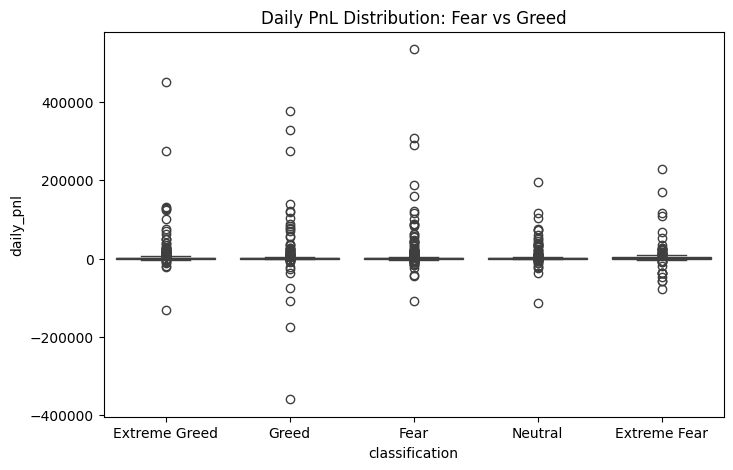

In [22]:
plt.figure(figsize=(8,5))
sns.boxplot(data=merged, x="classification", y="daily_pnl")
plt.title("Daily PnL Distribution: Fear vs Greed")
plt.show()


In [23]:
print(winrate_by_sentiment)


classification
Extreme Greed    0.386387
Fear             0.364033
Neutral          0.355414
Greed            0.343559
Extreme Fear     0.329659
Name: win_rate, dtype: float64


## Trade frequency by sentiment

In [24]:
trades_by_sentiment = (
    merged.groupby("classification")["trade_count"]
    .mean()
    .sort_values(ascending=False)
)

display(trades_by_sentiment)


classification
Extreme Fear     133.750000
Neutral          100.228723
Fear              98.153968
Greed             77.628086
Extreme Greed     76.030418
Name: trade_count, dtype: float64

## Average position size

In [25]:
size_by_sentiment = (
    merged.groupby("classification")["avg_trade_size"]
    .mean()
    .sort_values(ascending=False)
)

display(size_by_sentiment)


classification
Fear             8975.928546
Neutral          6963.694861
Extreme Fear     6773.464125
Greed            6427.866594
Extreme Greed    5371.637182
Name: avg_trade_size, dtype: float64

## Long bias

In [26]:
long_bias = (
    merged.groupby("classification")["long_ratio"]
    .mean()
    .sort_values(ascending=False)
)

display(long_bias)


classification
Extreme Fear     0.531533
Fear             0.518967
Extreme Greed    0.473116
Neutral          0.472431
Greed            0.471594
Name: long_ratio, dtype: float64

In [27]:
print(trades_by_sentiment)


classification
Extreme Fear     133.750000
Neutral          100.228723
Fear              98.153968
Greed             77.628086
Extreme Greed     76.030418
Name: trade_count, dtype: float64


##  Trader Segmentation
High v/s Low leverage traders

In [28]:
# average leverage proxy using position size vs pnl scale
# (since explicit leverage column not cleanly usable)

trader_activity = (
    merged.groupby("Account")
    .agg(
        avg_daily_pnl=("daily_pnl", "mean"),
        total_trades=("trade_count", "sum"),
        avg_position_size=("avg_trade_size", "mean"),
        avg_win_rate=("win_rate", "mean"),
    )
    .reset_index()
)

trader_activity.head()


,Account,avg_daily_pnl,total_trades,avg_position_size,avg_win_rate
0,0x083384f897ee0f19899168e3b1bec365f52a9012,66676.242499,3818,33569.102224,0.352333
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,920.871548,7280,4359.830930,0.397134
2,0x271b280974205ca63b716753467d5a371de622ab,-5869.682610,3809,11057.118419,0.379952
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,817.684040,13311,484.844294,0.452509
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,2444.318913,3239,2553.757037,0.498708


Frequent vs Infrequent traders

In [29]:
median_trades = trader_activity["total_trades"].median()

trader_activity["trader_type"] = np.where(
    trader_activity["total_trades"] >= median_trades,
    "Frequent",
    "Infrequent"
)

trader_activity["trader_type"].value_counts()


trader_type
Frequent      16
Infrequent    16
Name: count, dtype: int64

## Comparing performance

In [30]:
segment_perf = (
    trader_activity.groupby("trader_type")["avg_daily_pnl"]
    .mean()
    .sort_values(ascending=False)
)

display(segment_perf)


trader_type
Frequent      9320.159763
Infrequent    4933.922035
Name: avg_daily_pnl, dtype: float64

## Do frequent traders behave differently under Fear vs Greed?

Merging trader type back

In [31]:
merged = merged.merge(
    trader_activity[["Account", "trader_type"]],
    on="Account",
    how="left"
)

merged.head()


,Account,date,daily_pnl,trade_count,avg_trade_size,win_rate,long_ratio,short_ratio,classification,trader_type
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,0.0,177,5089.718249,0.000000,0.000000,1.000000,Extreme Greed,Frequent
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,0.0,68,7976.664412,0.000000,0.000000,1.000000,Extreme Greed,Frequent
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,0.0,40,23734.500000,0.000000,0.000000,1.000000,Extreme Greed,Frequent
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,-21227.0,12,28186.666667,0.000000,1.000000,0.000000,Extreme Greed,Frequent
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,1603.1,27,17248.148148,0.444444,0.444444,0.555556,Extreme Greed,Frequent


Checking performance of both segment and sentiment 

In [32]:
interaction_perf = (
    merged.groupby(["classification", "trader_type"])["daily_pnl"]
    .mean()
    .unstack()
)

display(interaction_perf)


trader_type,Frequent,Infrequent
classification,,
Extreme Fear,5246.869937,3239.091109
Extreme Greed,5918.654027,3333.974107
Fear,6139.097134,3045.304693
Greed,2293.016352,6663.112910
Neutral,3978.072238,1473.942780


## Visualisation

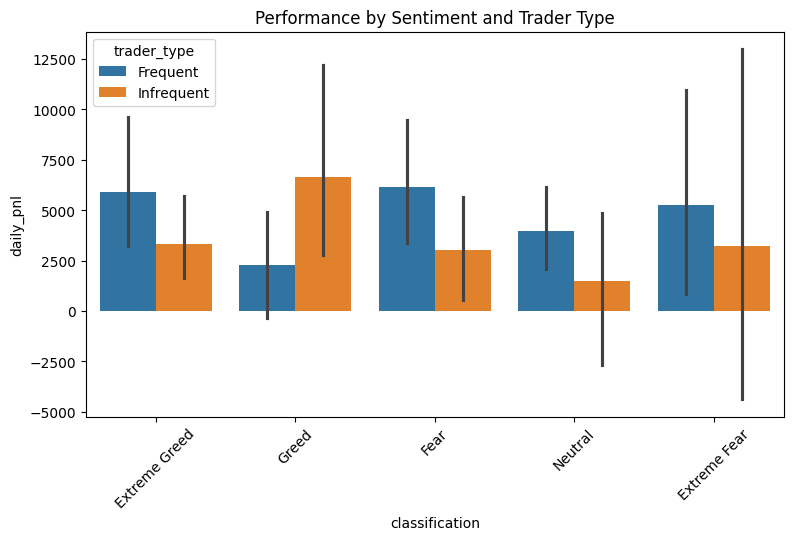

In [33]:
plt.figure(figsize=(9,5))
sns.barplot(
    data=merged,
    x="classification",
    y="daily_pnl",
    hue="trader_type"
)
plt.title("Performance by Sentiment and Trader Type")
plt.xticks(rotation=45)
plt.show()


## Strategy Summary Table

In [34]:
strategy_summary = merged.groupby(
    ["classification", "trader_type"]
).agg(
    avg_pnl=("daily_pnl", "mean"),
    avg_win_rate=("win_rate", "mean"),
    avg_trades=("trade_count", "mean")
).reset_index()

display(strategy_summary)


,classification,trader_type,avg_pnl,avg_win_rate,avg_trades
0,Extreme Fear,Frequent,5246.869937,0.331250,153.581818
1,Extreme Fear,Infrequent,3239.091109,0.326159,90.120000
2,Extreme Greed,Frequent,5918.654027,0.411166,94.139785
3,Extreme Greed,Infrequent,3333.974107,0.326532,32.285714
4,Fear,Frequent,6139.097134,0.382377,119.615054
5,Fear,Infrequent,3045.304693,0.312335,37.672727
6,Greed,Frequent,2293.016352,0.349014,91.703629
7,Greed,Infrequent,6663.112910,0.325759,31.697368
8,Neutral,Frequent,3978.072238,0.378311,115.040678
9,Neutral,Infrequent,1473.942780,0.272025,46.283951


## Adding PnL Volatility (drawdown proxy)
Volatility by sentiment

In [35]:
vol_by_sentiment = (
    merged.groupby("classification")["daily_pnl"]
    .std()
    .sort_values(ascending=False)
)

display(vol_by_sentiment)


classification
Fear             31659.771538
Greed            30599.040173
Extreme Fear     29534.839183
Extreme Greed    27496.863832
Neutral          17447.863645
Name: daily_pnl, dtype: float64

## Boxplot with better visibility (minor upgrade for better insights)

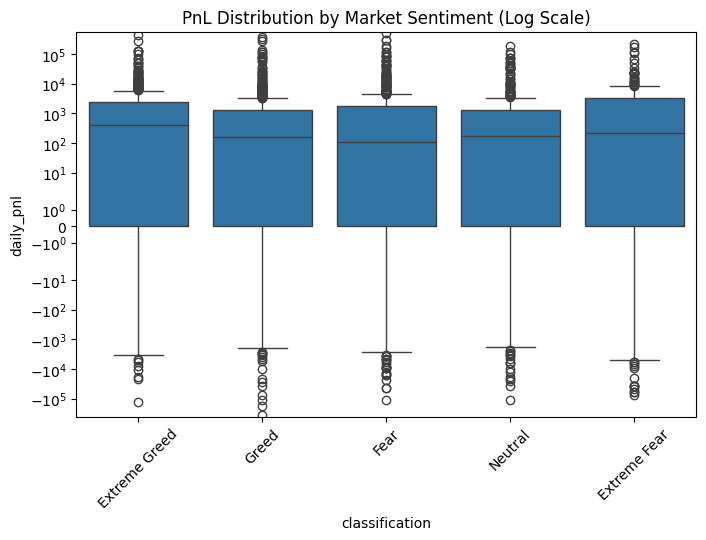

In [36]:
plt.figure(figsize=(8,5))
sns.boxplot(data=merged, x="classification", y="daily_pnl")
plt.yscale("symlog")  # helps with extreme pnl values
plt.title("PnL Distribution by Market Sentiment (Log Scale)")
plt.xticks(rotation=45)
plt.show()


## Consistent Winners Segment (This gives a third segmentation dimension.)

Defining consistent winners

In [37]:
trader_activity["winner_type"] = np.where(
    trader_activity["avg_win_rate"] >= trader_activity["avg_win_rate"].median(),
    "Consistent",
    "Inconsistent"
)

trader_activity["winner_type"].value_counts()


winner_type
Consistent      16
Inconsistent    16
Name: count, dtype: int64

Performance comparison

In [38]:
winner_perf = (
    trader_activity.groupby("winner_type")["avg_daily_pnl"]
    .mean()
    .sort_values(ascending=False)
)

display(winner_perf)


winner_type
Consistent      8458.318578
Inconsistent    5795.763220
Name: avg_daily_pnl, dtype: float64

## Final Insights & Business Takeaways

-> **Frequent traders outperform infrequent traders** on average daily PnL, indicating that higher market participation and experience may contribute to better trading outcomes.

-> **Fear-driven market regimes show stronger profitability** compared to greed regimes, suggesting that traders tend to capture better opportunities during risk-off or panic conditions.

->**Extreme Fear periods exhibit the highest trading activity**, implying that market stress triggers increased participation and potential short-term opportunities.

-> **Long bias is slightly elevated during fear regimes**, indicating traders may be positioning for mean-reversion or relief rallies when sentiment is pessimistic.

-> **Consistent winners maintain superior average performance** across market regimes, highlighting that trader skill and discipline matter more than market sentiment alone.

-> **PnL volatility is highest during Fear and Greed extremes**, suggesting that risk management becomes especially critical during emotionally charged market conditions.
